# Simple Linear Regression

We used the correlation function to measure the strength of the linear relationship between two variables. For most applications, knowing that such a linear relationship exists isn’t enough. We’ll want to be able to understand the nature of the relationship. This is where we’ll use simple linear regression.


## The Model

$$y_i = \beta x_i + \alpha + \epsilon_i$$


where 

- $y_i$ is the number of minutes user i spends on the site daily, 
- $x_i$ is the number of friends user i has
- $\alpha$ is the constant when x = 0.
- $ε_i$ is a (hopefully small) error term representing the fact that there are other factors not accounted for by this simple model.

# Least Squares Fit

In [15]:
from collections import Counter, defaultdict
from linear_algebra import vector_subtract
from stats import mean, correlation, standard_deviation, de_mean
from gradient_descent import minimize_stochastic
import math, random
import matplotlib.pyplot as plt

If we know alpha and beta, then we can make predictions.

In [11]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

In [ ]:
Since we know the actual output y_i we can compute the error for each pair:

In [12]:
def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

Since the negative errors cancel out with the positive ones, we use squared errors:

In [14]:
def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

The least squares solution is to choose the alpha and beta that make sum_of_squared_errors as small as possible.

Using calculus (or tedious algebra), the error-minimizing alpha and beta are given by:

$$\rho_{X,Y}=\mathrm{corr}(X,Y)={\mathrm{cov}(X,Y) \over \sigma_X \sigma_Y} ={E[(X-\mu_X)(Y-\mu_Y)] \over \sigma_X\sigma_Y}$$

In [2]:
def least_squares_fit(x,y):
    """given training values for x and y,
    find the least-squares values of alpha and beta"""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

The choice of beta means that when the input value increases by standard_devia tion(x), the prediction increases by correlation(x, y) * standard_devia tion(y). 

- In the case when x and y are perfectly correlated, a one standard deviation increase in x results in a one-standard-deviation-of-y increase in the prediction.
- When they’re perfectly anticorrelated, the increase in x results in a decrease in the prediction. 
- And when the correlation is zero, beta is zero, which means that changes in x don’t affect the prediction at all.

In [18]:
num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
print("alpha", alpha)
print("beta", beta)

alpha 22.94755241346903
beta 0.903865945605865


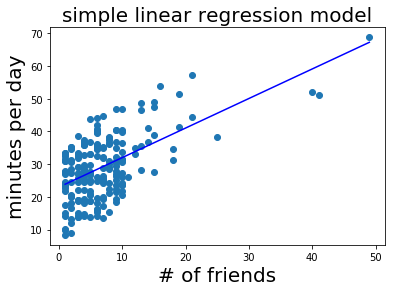

In [25]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.plot(num_friends_good, [alpha + beta*i for i in num_friends_good], 'b-')
plt.xlabel('# of friends', fontsize = 20)
plt.ylabel('minutes per day', fontsize = 20)
plt.title('simple linear regression model', fontsize = 20)
plt.show()

Of course, we need a better way to figure out how well we’ve fit the data than staring at the graph. 

A common measure is the coefficient of determination (or R-squared), which measures the fraction of the total variation in the dependent variable that is captured by the model:

In [3]:
def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    """the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model"""

    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

In [9]:
print("r-squared", r_squared(alpha, beta, num_friends_good, daily_minutes_good))


r-squared 0.3291078377836305


# Gradient Descent

In [5]:
def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),       # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i] # beta partial derivative



In [10]:
print("gradient descent:")
# choose random value to start
random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error,
                                  squared_error_gradient,
                                  num_friends_good,
                                  daily_minutes_good,
                                  theta,
                                  0.0001)
print("alpha", alpha)
print("beta", beta)


gradient descent:
alpha 22.93746417548679
beta 0.9043371597664965


In [ ]:
# Matrix

In [81]:
# https://github.com/computational-class/machinelearninginaction/blob/master/Ch08/regression.py

import pandas as pd
import random

dat = pd.read_csv('ex0.txt', sep = '\t', names = ['x1', 'x2', 'y'])
dat['x3'] = [yi*.3 + random.random() for yi in y]
dat.head()

,x1,x2,y,x3
0,1.0,0.067732,3.176513,1.626667
1,1.0,0.427810,3.816464,1.342464
2,1.0,0.995731,4.550095,1.688268
3,1.0,0.738336,4.256571,1.694123
4,1.0,0.981083,4.560815,1.719997


In [82]:
# https://github.com/computational-class/machinelearninginaction/blob/master/Ch08/regression.py

from numpy import mat, linalg, corrcoef
def standRegres(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [83]:
xs = [[dat.x1[i], dat.x2[i], dat.x3[i]] for i in dat.index]
y = dat.y

xs[:2]

[[1.0, 0.067732000000000001, 1.6266671187695159],
 [1.0, 0.42781000000000002, 1.3424642086215144]]

In [84]:
ws = standRegres(xs, y)
ws

matrix([[ 2.93979453],
        [ 1.66601535],
        [ 0.05008515]])

In [85]:
xMat=mat(xs)
yMat=mat(y)
yHat = xMat*ws

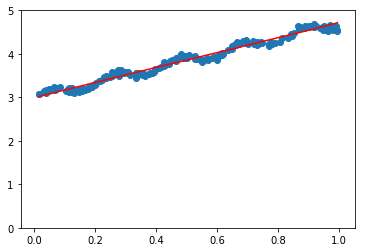

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])
xCopy=xMat.copy()
xCopy.sort(0)
yHat=xCopy*ws

ax.plot(xCopy[:,1],yHat, 'r-')
plt.ylim(0, 5)
plt.show()

In [87]:
yHat = xMat*ws
corrcoef(yHat.T, yMat)

array([[ 1.        ,  0.98683562],
       [ 0.98683562,  1.        ]])